# Solving XOR with Tensorflow

Solving XOR is comparably difficult for Deep Neural Networks. Hence, it serves as a nice demonstration of how random DL does behave. The below script (depending on the random initial conditions) has created a good model, but for an average run, it won't get XOR done. 


In [53]:
# import libraries
import numpy as np;
from matplotlib import pyplot as plt 
import tensorflow as tf;
import tensorflow.keras as keras

The XOR dataset is comparably small. It has just four examples for the four known values of xor. We do not need a train/test split as there is no generalization. Either we are right for XOR or wrong. 

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 0


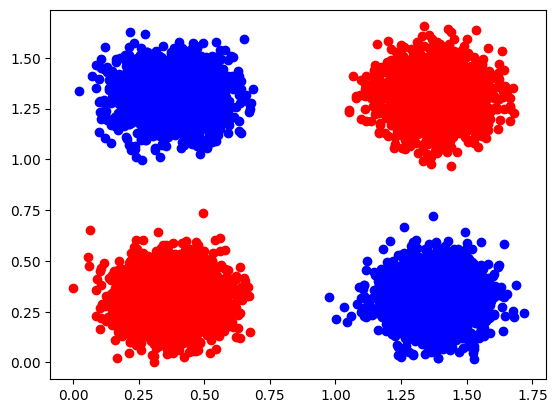

In [54]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [ (x != y)*1 for x,y in X] # xor is one is they are the same
for a,b in zip(X,y):
   print(a,b)


# make this dataset larger to have more examples in each epoch

X = np.repeat(X, 2500, axis=0)
y = np.repeat(y, 2500)


# Augment: add random noise, otherwise, we get stuck. Let us just add random noise around the points with a certain deviation
X = X + np.random.normal(0,0.1,size=X.shape[0] * 2, ).reshape(-1,2)
X = X - np.min(X,axis=0) # shift to positive numbers only

plt.scatter(X[y ==0,0],X[y ==0,1],c='red')
plt.scatter(X[y !=0,0],X[y !=0,1],c='blue')
plt.show()



# Build the network

In [55]:
model = keras.Sequential(
    [
        keras.Input(shape=(2,)),
        keras.layers.Dense(2, activation="relu"), # tanh, linear, sigmoid,
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)


# Train



In [56]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(
    learning_rate=0.1), metrics=['accuracy'])
# loss: binary_crossentropy
# optimizer: Adam
history = model.fit(X,y, batch_size=1,epochs=10)


10000/10000 [==============================] - 17s 2ms/step - loss: 0.2515 - accuracy: 0.5029


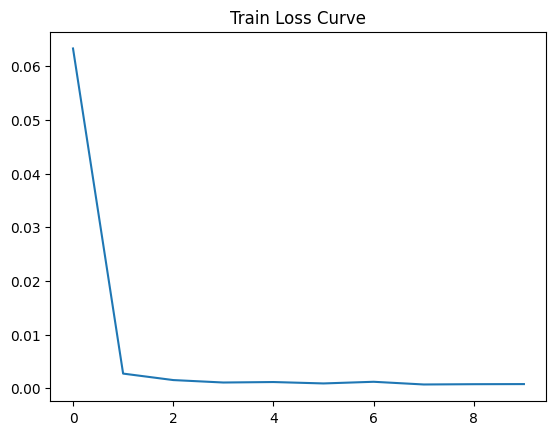

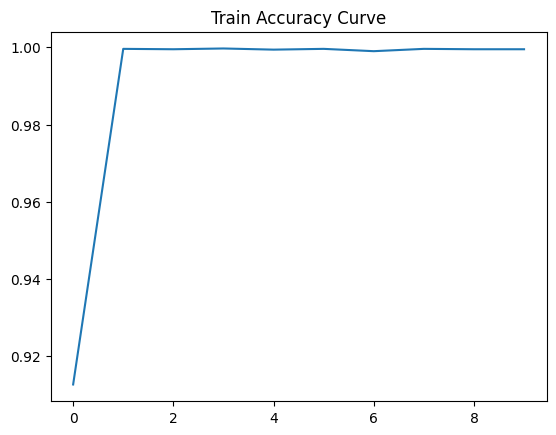

In [46]:
plt.plot(history.epoch, history.history["loss"])
plt.title("Train Loss Curve")
plt.show()

plt.plot(history.epoch, history.history["accuracy"])
plt.title("Train Accuracy Curve")
plt.show()


313/313 [==============================] - 1s 2ms/step


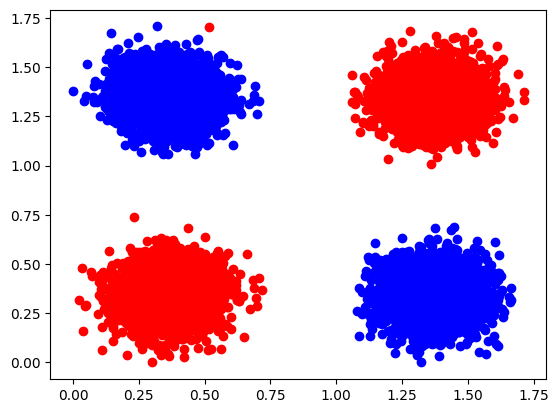

In [47]:
y_pred = (model.predict(X) > 0.5) * 1
y_pred = y_pred.flatten()
plt.scatter(X[y_pred ==0,0],X[y_pred ==0,1],c='red')
plt.scatter(X[y_pred !=0,0],X[y_pred !=0,1],c='blue')
plt.show()


# Conclusion 
As you can see, even small toy problems like XOR are not neededly easy to solve just by knowing that the solution does exist. 

In [48]:
model.save_weights("working-weights.h5")


In [52]:
for l in model.layers:
    print(l.weights)

[<tf.Variable 'dense_12/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[3.1469293, 4.1536727],
       [3.0161998, 4.2265525]], dtype=float32)>, <tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([-2.7580862, -7.6647024], dtype=float32)>]
[<tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 4.456882],
       [-8.551814]], dtype=float32)>, <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-4.521312], dtype=float32)>]
